In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [2]:
house = pd.read_csv('AmesHousing.tsv', sep='\t')

In [3]:
def transform_features(df):
    return df
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]
def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    lr = LinearRegression()
    lr.fit(train.drop(['SalePrice'],axis=1),train['SalePrice'])
    predictions = lr.predict(test.drop(['SalePrice'],axis=1))
    mses = mean_squared_error(test['SalePrice'],predictions)
    return mses**(1/2)

transform_df = transform_features(house)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse


57088.251612639091

### Feature Engineering

* Handle missing values:
  * All columns:
    * Drop any with 5% or more missing values for now.
  * Text columns:
    * Drop any with 1 or more missing values for now.
  * Numerical columns:
    * For columns with missing values, fill in with the most common value in that column
    
1: All columns: Drop any with 5% or more missing values for now. 

In [4]:
df = house.copy()
missing = df.isnull().sum()
drop_cols = missing[missing>len(df)*0.05].index
df = df.drop(drop_cols, axis=1)

2: Text columns: Drop any with 1 or more missing values for now.

In [5]:
text_cols = df.select_dtypes(include=['object'])
text_missing = text_cols.isnull().sum()
text_missing_cols = text_missing[text_missing>=1]
df = df.drop(text_missing_cols.index,axis=1)

3: Numerical columns: For columns with missing values, fill in with the most common value in that column

In [6]:
num_cols = df.select_dtypes(include=['int','float'])
mode_cols = num_cols.mode()
num_cols = num_cols.fillna(value=mode_cols.iloc[0])
df[num_cols.columns] = num_cols
print(df.isnull().sum().value_counts())

0    64
dtype: int64


* Create new features: years_till_sold, years_since_remod

In [7]:
df['years_till_sold'] = df['Yr Sold'] - df['Year Built']
df['years_since_remod'] = df['Year Remod/Add'] - df['Year Built']
df[['years_till_sold','years_since_remod']].describe()

,years_till_sold,years_since_remod
count,2930.000000,2930.000000
mean,36.434130,12.910239
std,30.291357,24.032451
min,-1.000000,-1.000000
25%,7.000000,0.000000
50%,34.000000,0.000000
75%,54.000000,18.000000
max,136.000000,127.000000


Delete rows with values that doesn't make sense (<0) and drop the original year columns

In [8]:
df = df.drop(df[df['years_till_sold']<0].index)
df = df.drop(df[df['years_since_remod']<0].index)
df = df.drop(['Year Built','Year Remod/Add','Yr Sold'],axis=1)

Drop columns that aren't useful for machine learning and leak data about the final sale

In [9]:
df = df.drop(['Order', 'PID'],axis=1)
df = df.drop(['Mo Sold','Sale Type','Sale Condition'],axis=1)

Update transform_features() with above code

In [10]:
def transform_features(df):
    

    return df
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]
def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    lr = LinearRegression()
    lr.fit(train.drop(['SalePrice'],axis=1),train['SalePrice'])
    predictions = lr.predict(test.drop(['SalePrice'],axis=1))
    mses = mean_squared_error(test['SalePrice'],predictions)
    return mses**(1/2)

transform_df = transform_features(house)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse


57088.251612639091

In [11]:
df = house.copy()
missing = df.isnull().sum()
drop_cols = missing[missing>len(df)*0.05].index
df = df.drop(drop_cols, axis=1)

2: Text columns: Drop any with 1 or more missing values for now.

In [12]:
text_cols = df.select_dtypes(include=['object'])
text_missing = text_cols.isnull().sum()
text_missing_cols = text_missing[text_missing>=1]
df = df.drop(text_missing_cols.index,axis=1)

3: Numerical columns: For columns with missing values, fill in with the most common value in that column

In [13]:
num_cols = df.select_dtypes(include=['int','float'])
mode_cols = num_cols.mode()
num_cols = num_cols.fillna(value=mode_cols.iloc[0])
df[num_cols.columns] = num_cols
print(df.isnull().sum().value_counts())

0    64
dtype: int64


* Create new features: years_till_sold, years_since_remod

In [14]:
df['years_till_sold'] = df['Yr Sold'] - df['Year Built']
df['years_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']

Delete rows with values that doesn't make sense (<0) and drop the original year columns

In [15]:
df = df.drop(df[df['years_till_sold']<0].index)
df = df.drop(df[df['years_since_remod']<0].index)
df = df.drop(['Year Built','Year Remod/Add','Yr Sold'],axis=1)

Drop columns that aren't useful for machine learning and leak data about the final sale

In [16]:
df = df.drop(['Order','PID'],axis=1)
df = df.drop(['Mo Sold','Sale Type','Sale Condition'],axis=1)

Update transform_features() with above code

In [17]:
def transform_features(df):
    missing = df.isnull().sum()
    drop_cols = missing[missing>len(df)*0.05].index
    df = df.drop(drop_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    text_missing = text_cols.isnull().sum()
    text_missing_cols = text_missing[text_missing>=1]
    df = df.drop(text_missing_cols.index,axis=1)
    
    num_cols = df.select_dtypes(include=['int','float'])
    mode_cols = num_cols.mode()
    num_cols = num_cols.fillna(value=mode_cols.iloc[0])
    df[num_cols.columns] = num_cols
    
    df['years_till_sold'] = df['Yr Sold'] - df['Year Built']
    df['years_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']
    
    df = df.drop(df[df['years_till_sold']<0].index)
    df = df.drop(df[df['years_since_remod']<0].index)
    df = df.drop(['Year Built','Year Remod/Add','Yr Sold'],axis=1)
    
    df = df.drop(['Order','PID'],axis=1)
    df = df.drop(['Mo Sold','Sale Type','Sale Condition'],axis=1)
    return df
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]
def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    lr = LinearRegression()
    lr.fit(train.drop(['SalePrice'],axis=1),train['SalePrice'])
    predictions = lr.predict(test.drop(['SalePrice'],axis=1))
    mses = mean_squared_error(test['SalePrice'],predictions)
    return mses**(1/2)

transform_df = transform_features(house)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse


55275.367312413073

## Feature Selection
Generate correlation heatmap matrix of the numerical features in the training data set

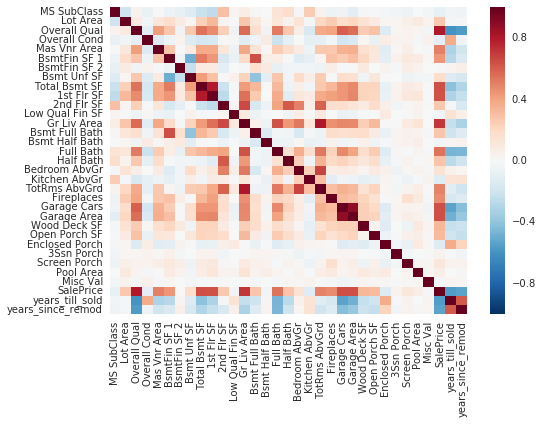

In [18]:
num_cols = df.select_dtypes(include=['int','float'])
corrs = num_cols.corr()
sns.heatmap(corrs)

Examine the correlations between all numeric colunms and the target column,SalePrice

In [19]:
np.absolute(corrs['SalePrice']).sort_values(ascending=False)

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
years_till_sold      0.558979
Full Bath            0.546118
years_since_remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Wood Deck SF         0.328183
Open Porch SF        0.316262
Half Bath            0.284871
Bsmt Full Bath       0.276258
2nd Flr SF           0.269601
Lot Area             0.267520
Bsmt Unf SF          0.182751
Bedroom AbvGr        0.143916
Enclosed Porch       0.128685
Kitchen AbvGr        0.119760
Screen Porch         0.112280
Overall Cond         0.101540
MS SubClass          0.085128
Pool Area            0.068438
Low Qual Fin SF      0.037629
Bsmt Half Bath       0.035875
3Ssn Porch           0.032268
Misc Val             0.019273
BsmtFin SF 2         0.006127
Name: Sale

Select features with strong correlations using 0.4 as cut off and avoid using coleanarity variables, e.g., garage cars & garage area, Gr Liv Area & 1st Flr SF, years_till_sold & years_since_remod, BsmtFin SF 1 & Total Bsmt SF

In [20]:
features = ['Overall Qual','Gr Liv Area','Garage Area','Total Bsmt SF'
           'years_till_sold','Full Bath','Mas Vnr Area','TotRms AbvGrd','Fireplaces']

In [21]:
def transform_features(df):
    missing = df.isnull().sum()
    drop_cols = missing[missing>len(df)*0.05].index
    df = df.drop(drop_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    text_missing = text_cols.isnull().sum()
    text_missing_cols = text_missing[text_missing>=1]
    df = df.drop(text_missing_cols.index,axis=1)
    
    num_cols = df.select_dtypes(include=['int','float'])
    mode_cols = num_cols.mode()
    num_cols = num_cols.fillna(value=mode_cols.iloc[0])
    df[num_cols.columns] = num_cols
    
    df['years_till_sold'] = df['Yr Sold'] - df['Year Built']
    df['years_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']
    
    df = df.drop(df[df['years_till_sold']<0].index)
    df = df.drop(df[df['years_since_remod']<0].index)
    df = df.drop(['Year Built','Year Remod/Add','Yr Sold'],axis=1)
    
    df = df.drop(['Order','PID'],axis=1)
    df = df.drop(['Mo Sold','Sale Type','Sale Condition'],axis=1)
    return df
def select_features(df):
    selected = ['Overall Qual','Gr Liv Area','Garage Area','Total Bsmt SF',
           'years_till_sold','Full Bath','Mas Vnr Area','TotRms AbvGrd','Fireplaces','SalePrice']
    return df[selected]
def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    lr = LinearRegression()
    lr.fit(train.drop(['SalePrice'],axis=1),train['SalePrice'])
    predictions = lr.predict(test.drop(['SalePrice'],axis=1))
    mses = mean_squared_error(test['SalePrice'],predictions)
    return mses**(1/2)

transform_df = transform_features(house)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse


36971.974444198

Nominal columns:
* nominal features that are currently numerical need to be changed to category
* select columns less than 10 unique values
* select columns with moderate variance

First, we create a list of nominal features from the documentation.

In [22]:
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
category_features = []
for col in nominal_features:
    if col in df:
        category_features.append(col)
        

unique_count = df[category_features].apply(lambda col: len(col.value_counts()))
drop_cols = unique_count[unique_count>=10].index
keep_cols = unique_count[unique_count<10].index
transform_df = df.drop(drop_cols, axis=1)

In [23]:
n = transform_df.shape[0]
low_var_cols = []
for col in keep_cols:
    distribution = (transform_df[col].value_counts())*100/n
    if distribution[0]>95:
        low_var_cols.append(col)
transform_df = transform_df.drop(low_var_cols,axis=1)

Transform the text columns(nominal and some ordinal) to category type

In [24]:
text_cols = transform_df.select_dtypes(include=['object']).columns
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')

transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)


Update select_features function.

In [26]:
def transform_features(df):
    missing = df.isnull().sum()
    drop_cols = missing[missing>len(df)*0.05].index
    df = df.drop(drop_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    text_missing = text_cols.isnull().sum()
    text_missing_cols = text_missing[text_missing>=1]
    df = df.drop(text_missing_cols.index,axis=1)
    
    num_cols = df.select_dtypes(include=['int','float'])
    mode_cols = num_cols.mode()
    num_cols = num_cols.fillna(value=mode_cols.iloc[0])
    df[num_cols.columns] = num_cols
    
    df['years_till_sold'] = df['Yr Sold'] - df['Year Built']
    df['years_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']
    
    df = df.drop(df[df['years_till_sold']<0].index)
    df = df.drop(df[df['years_since_remod']<0].index)
    df = df.drop(['Year Built','Year Remod/Add','Yr Sold'],axis=1)
    
    df = df.drop(['Order','PID'],axis=1)
    df = df.drop(['Mo Sold','Sale Type','Sale Condition'],axis=1)
    return df

def select_features(df,coeff_threshold=0.4, uniq_threshold=10):
    num_cols = df.select_dtypes(include=['int','float'])
    corrs = num_cols.corr()['SalePrice'].abs()
    drop_features = corrs[corrs<coeff_threshold].index
    df = df.drop(drop_features, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    category_features = []
    for col in nominal_features:
        if col in df:
            category_features.append(col)
        
    unique_count = df[category_features].apply(lambda col: len(col.value_counts()))
    drop_cols = unique_count[unique_count>=uniq_threshold].index
    df = df.drop(drop_cols, axis=1)
    
    n = transform_df.shape[0]
    low_var_cols = []
    cols = transform_df.select_dtypes(include=['object']).columns 
    for col in cols:
        distribution = (transform_df[col].value_counts())*100/n
        if distribution[0]>95:
            low_var_cols.append(col)
    df = df.drop(low_var_cols,axis=1)
    
    text_cols = df.select_dtypes(include=['object']).columns
    
    for col in text_cols:
        
        df[col] = df[col].astype('category')
        
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df

def train_and_test(df):
    numeric_df = df.select_dtypes(include=['int','float'])
    features = numeric_df.columns.drop(['SalePrice'])
    
    train = numeric_df.iloc[:1460]
    test = numeric_df.iloc[1460:]
    lr = LinearRegression()
    
    lr.fit(train[features],train['SalePrice'])
    predictions = lr.predict(test[features])
    mses = mean_squared_error(test['SalePrice'],predictions)
    return mses**(1/2)

transform_df = transform_features(house)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse


36623.535629104757

add parameters to the model

In [33]:
def train_and_test(df,k=0):
    numeric_df = df.select_dtypes(include=['int','float'])
    features = numeric_df.columns.drop(['SalePrice'])
    lr = LinearRegression()
    if k == 0:
        train = df.iloc[:1460]
        test = df.iloc[1460:]
        lr.fit(train[features],train['SalePrice'])
        predictions = lr.predict(test[features])
        mses = mean_squared_error(test['SalePrice'],predictions)
        return mses**(1/2)
    if k == 1:
        
        df = df.loc[np.random.permutation(len(numeric_df))]
        
        fold_one = numeric_df.iloc[:1460]
        fold_two = numeric_df.iloc[1460:]
        
        lr.fit(fold_one[features],fold_one['SalePrice'])
        predictions = lr.predict(fold_two[features])
        mses_1 = mean_squared_error(fold_two['SalePrice'],predictions)
        
        lr.fit(fold_two[features],fold_two['SalePrice'])
        predictions = lr.predict(fold_one[features])
        mses_2 = mean_squared_error(fold_one['SalePrice'],predictions)
        
        return (mses_1**(1/2)+mses_2**(1/2))/2
    else:
        kf = KFold(n_splits=k,shuffle=True)
        rmse = []
        for train_index, test_index in kf.split(df):
            train, test = df.iloc[train_index],df.iloc[test_index]
            lr.fit(train[features],train['SalePrice'])
            predictions = lr.predict(test[features])
            mses = mean_squared_error(test['SalePrice'],predictions)
            rmse.append(np.sqrt(mses))
        return np.mean(rmse)

transform_df = transform_features(house)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df,k=3)

rmse


33030.088294274225